In [2]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference')
print(os.getcwd())

/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference


In [3]:
import pprint
import glob
from pathlib import Path
import pickle
import random
import yaml
from PIL import Image

import numpy as np
import torch

from utils import general_utils, visualization_tools, eval_utils

In [5]:
device = torch.device("cuda:0")
classes = ["02691156"]
# path to the reconstruction dir. Must contain a "data_info".yaml file with its input_image_dir specified
# then, the input_image_dir must have a renders_camera_params.pt specifying the poses
for class_name in classes:
    input_dir_mesh = "/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/occupancy_networks/out/pytorch3d_renders/{}/generation/meshes".format(class_name)

    # obtaining corresponding img dir using data_info.yaml
    with open(os.path.join(input_dir_mesh, "data_info.yaml"), 'r') as f:
        input_dir_img = yaml.load(f, Loader=yaml.FullLoader)["dataset"]["input_dir_img"]
    # getting uncorrected gt poses inside img dir
    uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))

    # correcting and saving the pose distances, to fit the reconstructions
    corrected_pred_poses_dict = general_utils.correct_dists(input_dir_img, input_dir_mesh, uncorrected_pred_poses_dict, device, num_dists=40)
    corrected_pred_poses_path = os.path.join(input_dir_mesh, "rec_camera_params.pt")
    pickle.dump(corrected_pred_poses_dict, open(corrected_pred_poses_path,"wb"))

skipped fb62efc64c58d1e5e0d07a8ce78b9182
skipped d8a037897d5d5b108130971b27e95927
skipped ddfbeb997ef83cab884a857d19f7439f



eb2fbd46563e23635fc197bbabcd5bd -- uncorrected
{'azim': 274.0734558105469, 'elev': 40.0, 'dist': 1.0}


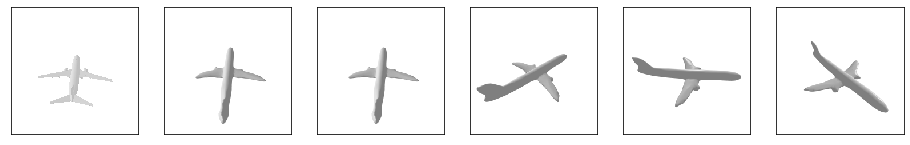

eb2fbd46563e23635fc197bbabcd5bd -- corrected
{'azim': 274.0734558105469, 'elev': 40.0, 'dist': 1.1410256624221802}


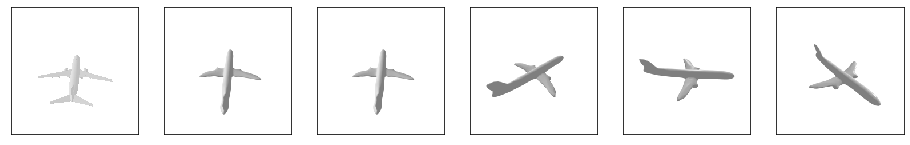

fef1c15a5db21b00a67cc8f661e7890a -- uncorrected
{'azim': 90.85770416259766, 'elev': 40.0, 'dist': 1.0}


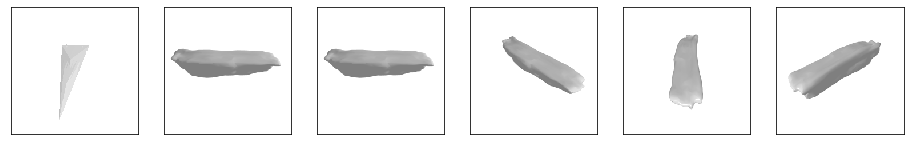

fef1c15a5db21b00a67cc8f661e7890a -- corrected
{'azim': 90.85770416259766, 'elev': 40.0, 'dist': 1.3974359035491943}


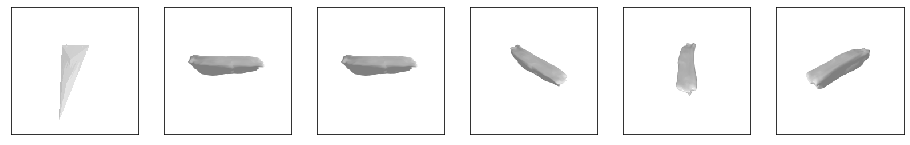

d1df81e184c71e0f26360e1e29a956c7 -- uncorrected
{'azim': 258.03289794921875, 'elev': 40.0, 'dist': 1.0}


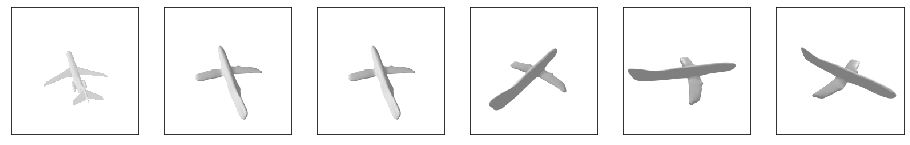

d1df81e184c71e0f26360e1e29a956c7 -- corrected
{'azim': 258.03289794921875, 'elev': 40.0, 'dist': 1.2051281929016113}


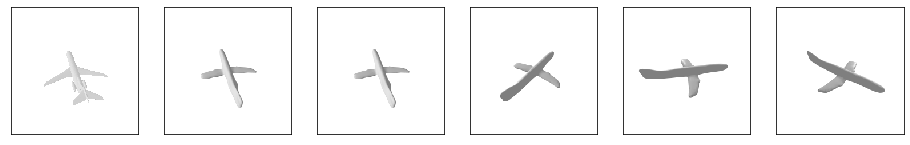

ec4f0bfd77978a1cca8607f540cc62ba -- uncorrected
{'azim': 125.63591766357422, 'elev': 40.0, 'dist': 1.0}


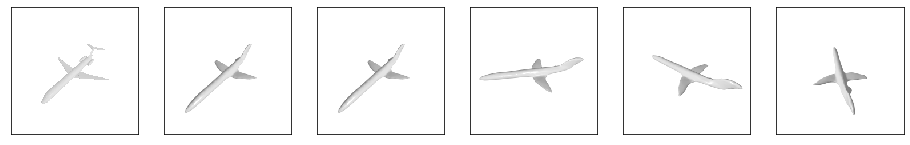

ec4f0bfd77978a1cca8607f540cc62ba -- corrected
{'azim': 125.63591766357422, 'elev': 40.0, 'dist': 1.0769230127334595}


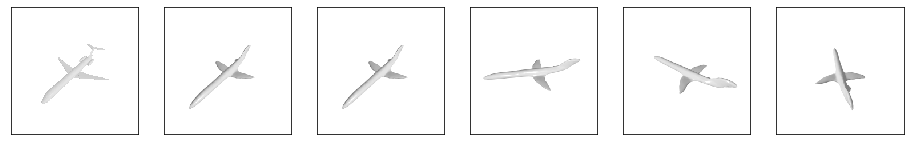

d605a53c0917acada80799ffaf21ea7d -- uncorrected
{'azim': 183.73355102539062, 'elev': 40.0, 'dist': 1.0}


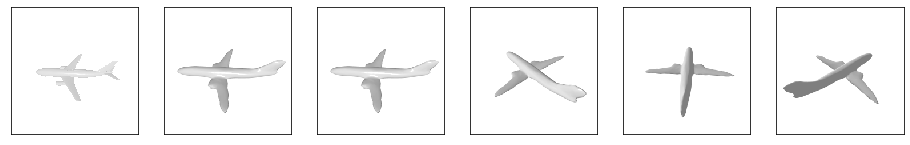

d605a53c0917acada80799ffaf21ea7d -- corrected
{'azim': 183.73355102539062, 'elev': 40.0, 'dist': 1.2692307233810425}


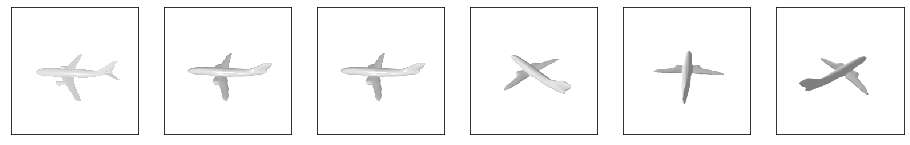

fcd7a8834a7f26f15069db69b8c1c70 -- uncorrected
{'azim': 147.3769073486328, 'elev': 40.0, 'dist': 1.0}


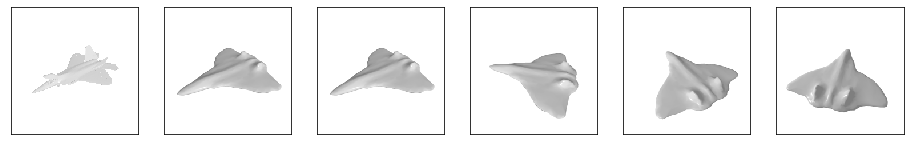

fcd7a8834a7f26f15069db69b8c1c70 -- corrected
{'azim': 147.3769073486328, 'elev': 40.0, 'dist': 1.2692307233810425}


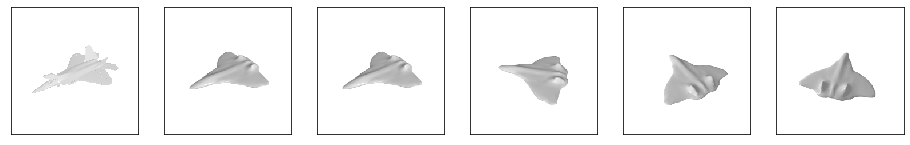

f2975fde05d9d63eeea0c0561850e04e -- uncorrected
{'azim': 185.9990234375, 'elev': 40.0, 'dist': 1.0}


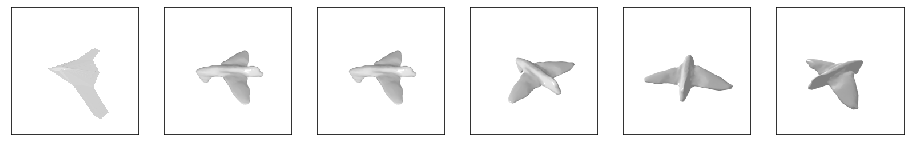

f2975fde05d9d63eeea0c0561850e04e -- corrected
{'azim': 185.9990234375, 'elev': 40.0, 'dist': 0.884615421295166}


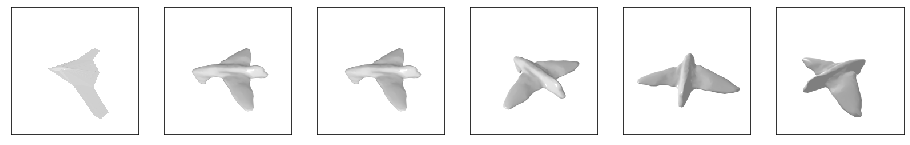

de9564aeaa585a6ccbc790a63192d2ab -- uncorrected
{'azim': 325.4793395996094, 'elev': 40.0, 'dist': 1.0}


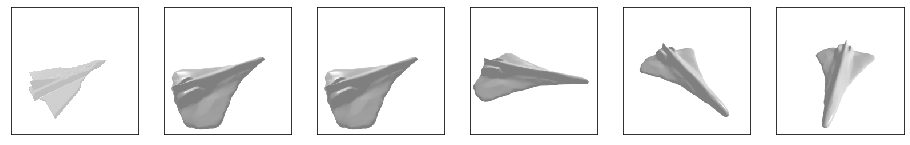

de9564aeaa585a6ccbc790a63192d2ab -- corrected
{'azim': 325.4793395996094, 'elev': 40.0, 'dist': 1.2692307233810425}


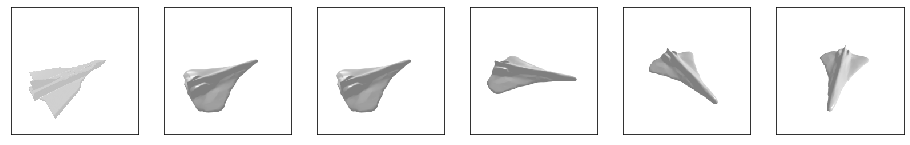

dbab9feed7e936cfa87372b03d6dc78b -- uncorrected
{'azim': 107.03172302246094, 'elev': 40.0, 'dist': 1.0}


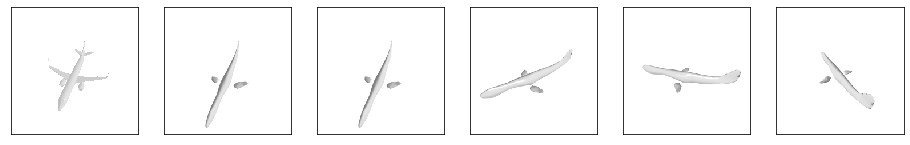

dbab9feed7e936cfa87372b03d6dc78b -- corrected
{'azim': 107.03172302246094, 'elev': 40.0, 'dist': 1.2051281929016113}


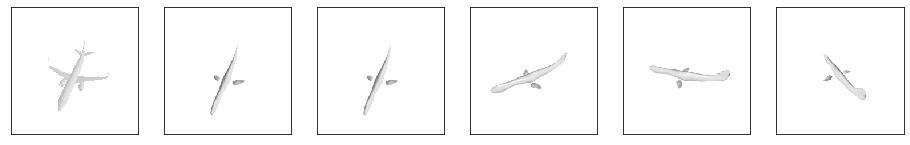

d1a8e79eebf4a0b1579c3d4943e463ef -- uncorrected
{'azim': 189.86000061035156, 'elev': 40.0, 'dist': 1.0}


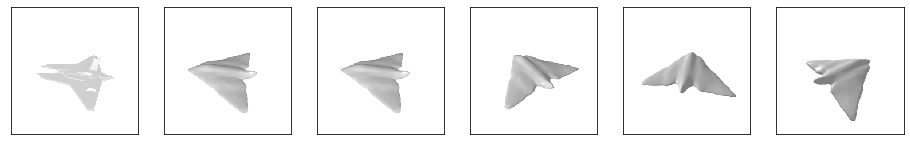

d1a8e79eebf4a0b1579c3d4943e463ef -- corrected
{'azim': 189.86000061035156, 'elev': 40.0, 'dist': 1.0128204822540283}


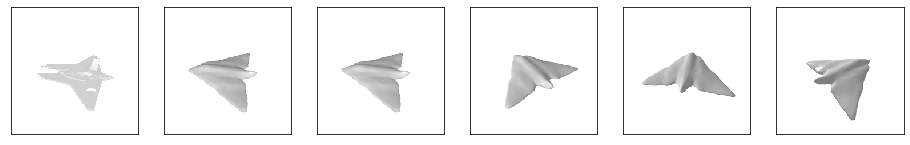

fbe788465e564e46bc0909d98a1ff2b4 -- uncorrected
{'azim': 101.14777374267578, 'elev': 40.0, 'dist': 1.0}


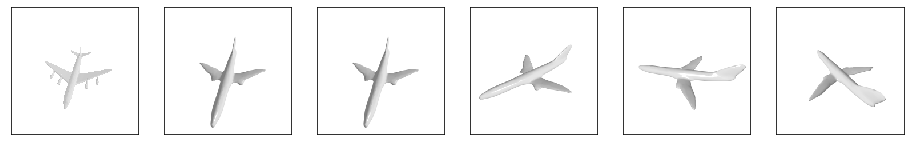

fbe788465e564e46bc0909d98a1ff2b4 -- corrected
{'azim': 101.14777374267578, 'elev': 40.0, 'dist': 1.0769230127334595}


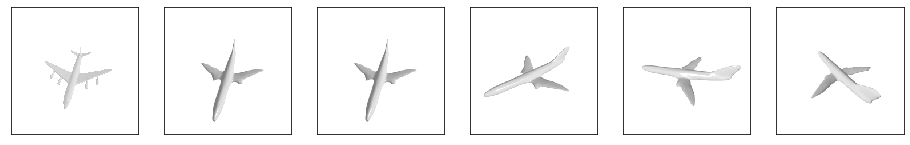

dd48aa92170bdde04c3a35cee92bb95b -- uncorrected
{'azim': 196.58810424804688, 'elev': 40.0, 'dist': 1.0}


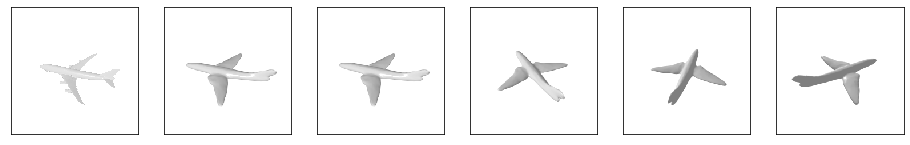

dd48aa92170bdde04c3a35cee92bb95b -- corrected
{'azim': 196.58810424804688, 'elev': 40.0, 'dist': 1.1410256624221802}


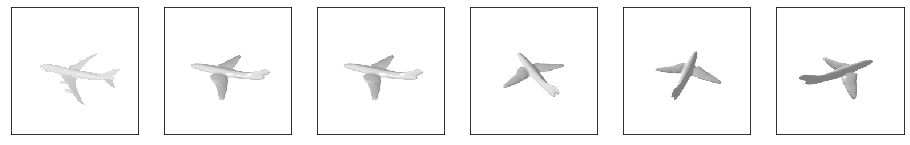

fe4ad5664773074cb536c73c7d134340 -- uncorrected
{'azim': 150.31307983398438, 'elev': 40.0, 'dist': 1.0}


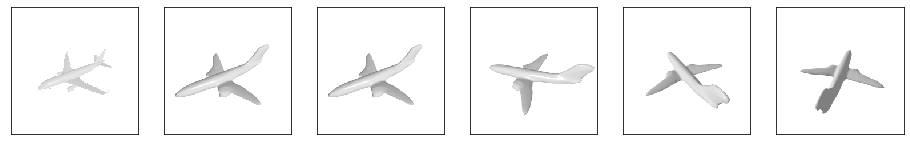

fe4ad5664773074cb536c73c7d134340 -- corrected
{'azim': 150.31307983398438, 'elev': 40.0, 'dist': 1.3333332538604736}


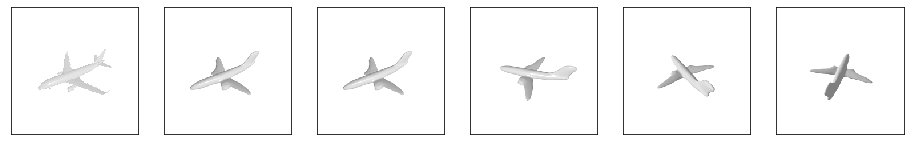

e380f6fa720e1c15560a4691498bd2fc -- uncorrected
{'azim': 285.6048889160156, 'elev': 40.0, 'dist': 1.0}


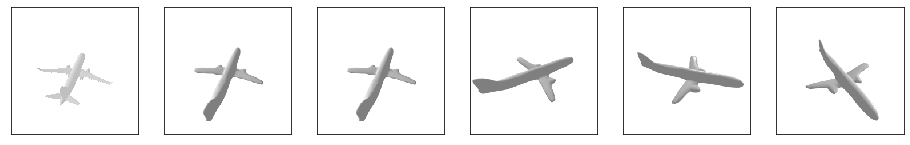

e380f6fa720e1c15560a4691498bd2fc -- corrected
{'azim': 285.6048889160156, 'elev': 40.0, 'dist': 1.2692307233810425}


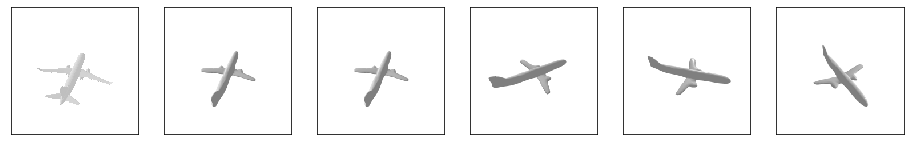

f58a26c915e7a1dceae7a0fa074b4a2a -- uncorrected
{'azim': 58.727394104003906, 'elev': 40.0, 'dist': 1.0}


KeyboardInterrupt: 

In [6]:
show_num = 20
uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))
corrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_mesh, "rec_camera_params.pt"), "rb"))

for i, instance in enumerate(uncorrected_pred_poses_dict):
    input_img_path = os.path.join(input_dir_img,"{}.png".format(instance))
    input_image = np.asarray(Image.open(input_img_path))
    input_mesh_path = os.path.join(input_dir_mesh,"{}.obj".format(instance))
    input_mesh = general_utils.load_untextured_mesh(input_mesh_path, device)
    
    print("{} -- uncorrected".format(instance))
    print(uncorrected_pred_poses_dict[instance])
    dist = uncorrected_pred_poses_dict[instance]["dist"]
    elev = uncorrected_pred_poses_dict[instance]["elev"]
    azim = uncorrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    
    print("{} -- corrected".format(instance))
    print(corrected_pred_poses_dict[instance])
    dist = corrected_pred_poses_dict[instance]["dist"]
    elev = corrected_pred_poses_dict[instance]["elev"]
    azim = corrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    if i > show_num:
        break
    print("======================================================================================================================================================================")
    print("======================================================================================================================================================================")